In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import fsspec

import xesmf as xe

In [2]:
#read CSV file with pandas
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

activity_id institution_id     source_id       experiment_id member_id  \
0  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
1  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
2  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
3  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   
4  HighResMIP           CMCC  CMCC-CM2-HR4  highresSST-present  r1i1p1f1   

  table_id variable_id grid_label  \
0     Amon          ps         gn   
1     Amon        rsds         gn   
2     Amon        rlus         gn   
3     Amon        rlds         gn   
4     Amon         psl         gn   

                                              zstore  dcpp_init_year   version  
0  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
1  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
2  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
3  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706  
4  gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN  20170706

In [3]:
#filtering data by variable (monthly near surface temperature)
df_tas = df.query("table_id == 'Amon' & variable_id == 'tas'")
df_tas

activity_id       institution_id        source_id       experiment_id  \
24       HighResMIP                 CMCC     CMCC-CM2-HR4  highresSST-present   
45       HighResMIP                 MOHC  HadGEM3-GC31-MM  highresSST-present   
82       HighResMIP                 MOHC  HadGEM3-GC31-HM  highresSST-present   
126      HighResMIP                 MOHC  HadGEM3-GC31-LM  highresSST-present   
187      HighResMIP                ECMWF     ECMWF-IFS-HR        control-1950   
...             ...                  ...              ...                 ...   
523651  ScenarioMIP                MIROC           MIROC6              ssp245   
523701         CMIP                 MOHC  HadGEM3-GC31-LL           piControl   
523712         CMIP                 CMCC     CMCC-CM2-SR5          historical   
523721         CMIP                 CMCC     CMCC-CM2-SR5          historical   
523769         CMIP  EC-Earth-Consortium    EC-Earth3-Veg          historical   

        member_id table_id variable_id grid_label  \
24       r1i1p1f1     Amon         tas         gn   
45       r1i1p1f1     Amon         tas         gn   
82       r1i1p1f1     Amon         tas         gn   
126      r1i1p1f1     Amon         tas         gn   
187      r1i1p1f1     Amon         tas         gr   
...           ...      ...         ...        ...   
523651  r29i1p1f1     Amon         tas         gn   
523701   r1i1p1f1     Amon         tas         gn   
523712   r3i1p2f1     Amon         tas         gn   
523721   r2i1p2f1     Amon         tas         gn   
523769   r1i1p1f1     Amon         tas         gr   

                                                   zstore  dcpp_init_year  \
24      gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
45      gs://cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-...             NaN   
82      gs://cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-...             NaN   
126     gs://cmip6/CMIP6/HighResMIP/MOHC/HadGEM3-GC31-...             NaN   
187     gs://cmip6/CMIP6/HighResMIP/ECMWF/ECMWF-IFS-HR...             NaN   
...                                                   ...             ...   
523651  gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp2...             NaN   
523701  gs://cmip6/CMIP6/CMIP/MOHC/HadGEM3-GC31-LL/piC...             NaN   
523712  gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...             NaN   
523721  gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...             NaN   
523769  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   

         version  
24      20170706  
45      20170818  
82      20170831  
126     20170906  
187     20170915  
...          ...  
523651  20210917  
523701  20211103  
523712  20211108  
523721  20211109  
523769  20211207  

[15492 rows x 11 columns]

In [4]:
#filtering by expreriment
df_exp_tas=df_tas[(df_tas["experiment_id"].isin(['historical', 'ssp585'])) & (df_tas["member_id"]=='r1i1p1f1')]
df_exp_tas

activity_id       institution_id      source_id experiment_id  \
866     ScenarioMIP            NOAA-GFDL       GFDL-CM4        ssp585   
8074           CMIP            NOAA-GFDL       GFDL-CM4    historical   
19008   ScenarioMIP            NOAA-GFDL      GFDL-ESM4        ssp585   
29231          CMIP                 IPSL   IPSL-CM6A-LR    historical   
32351          CMIP            NASA-GISS    GISS-E2-1-G    historical   
...             ...                  ...            ...           ...   
515778  ScenarioMIP         CSIRO-ARCCSS     ACCESS-CM2        ssp585   
517658  ScenarioMIP                CSIRO  ACCESS-ESM1-5        ssp585   
521076         CMIP                KIOST      KIOST-ESM    historical   
521172  ScenarioMIP                KIOST      KIOST-ESM        ssp585   
523769         CMIP  EC-Earth-Consortium  EC-Earth3-Veg    historical   

       member_id table_id variable_id grid_label  \
866     r1i1p1f1     Amon         tas        gr1   
8074    r1i1p1f1     Amon         tas        gr1   
19008   r1i1p1f1     Amon         tas        gr1   
29231   r1i1p1f1     Amon         tas         gr   
32351   r1i1p1f1     Amon         tas         gn   
...          ...      ...         ...        ...   
515778  r1i1p1f1     Amon         tas         gn   
517658  r1i1p1f1     Amon         tas         gn   
521076  r1i1p1f1     Amon         tas        gr1   
521172  r1i1p1f1     Amon         tas        gr1   
523769  r1i1p1f1     Amon         tas         gr   

                                                   zstore  dcpp_init_year  \
866     gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM...             NaN   
8074    gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...             NaN   
19008   gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...             NaN   
29231   gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...             NaN   
32351   gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...             NaN   
...                                                   ...             ...   
515778  gs://cmip6/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCE...             NaN   
517658  gs://cmip6/CMIP6/ScenarioMIP/CSIRO/ACCESS-ESM1...             NaN   
521076  gs://cmip6/CMIP6/CMIP/KIOST/KIOST-ESM/historic...             NaN   
521172  gs://cmip6/CMIP6/ScenarioMIP/KIOST/KIOST-ESM/s...             NaN   
523769  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   

         version  
866     20180701  
8074    20180701  
19008   20180701  
29231   20180803  
32351   20180827  
...          ...  
515778  20210317  
517658  20210318  
521076  20210601  
521172  20210601  
523769  20211207  

[90 rows x 11 columns]

In [5]:
#choosing 20 models (also used in IPCC's map)
df_model_tas=df_exp_tas[(df_exp_tas["source_id"].isin(['AWI-CM-1-1-MR', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CANESM5', 'CESM2-WACCM', 'CMCC-CM2-SR5', 'CNRM-CM6-1', 'CNRM-CM6-1-HR','CNRM-ESM2-1', 'EC-EARTH3', 'EC-EARTH3-Veg', 'FGOALS-g3','GFDL-CM4', 'GFDL-ESM4', 'HADGEM3-GC31-LL', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0', 'KACE-1-0-G', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']))]
df_model_tas

activity_id institution_id      source_id experiment_id member_id  \
866     ScenarioMIP      NOAA-GFDL       GFDL-CM4        ssp585  r1i1p1f1   
8074           CMIP      NOAA-GFDL       GFDL-CM4    historical  r1i1p1f1   
19008   ScenarioMIP      NOAA-GFDL      GFDL-ESM4        ssp585  r1i1p1f1   
43297          CMIP            BCC    BCC-CSM2-MR    historical  r1i1p1f1   
44593          CMIP          MIROC         MIROC6    historical  r1i1p1f1   
55765          CMIP            MRI     MRI-ESM2-0    historical  r1i1p1f1   
56326          CMIP           NCAR    CESM2-WACCM    historical  r1i1p1f1   
66586   ScenarioMIP            BCC    BCC-CSM2-MR        ssp585  r1i1p1f1   
204046  ScenarioMIP            AWI  AWI-CM-1-1-MR        ssp585  r1i1p1f1   
204283         CMIP            INM      INM-CM4-8    historical  r1i1p1f1   
204628  ScenarioMIP            INM      INM-CM4-8        ssp585  r1i1p1f1   
206457         CMIP            INM      INM-CM5-0    historical  r1i1p1f1   
212635  ScenarioMIP          MIROC         MIROC6        ssp585  r1i1p1f1   
213977         CMIP          NUIST          NESM3    historical  r1i1p1f1   
217228  ScenarioMIP           CAMS    CAMS-CSM1-0        ssp585  r1i1p1f1   
217462         CMIP           CAMS    CAMS-CSM1-0    historical  r1i1p1f1   
222133         CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1   
231165  ScenarioMIP          MPI-M  MPI-ESM1-2-LR        ssp585  r1i1p1f1   
237230         CMIP          MPI-M  MPI-ESM1-2-HR    historical  r1i1p1f1   
240714  ScenarioMIP           DKRZ  MPI-ESM1-2-HR        ssp585  r1i1p1f1   
244442  ScenarioMIP            INM      INM-CM5-0        ssp585  r1i1p1f1   
244695         CMIP      NOAA-GFDL      GFDL-ESM4    historical  r1i1p1f1   
245652  ScenarioMIP          NUIST          NESM3        ssp585  r1i1p1f1   
254492         CMIP            NCC     NorESM2-LM    historical  r1i1p1f1   
254866         CMIP            CAS      FGOALS-g3    historical  r1i1p1f1   
255035  ScenarioMIP            CAS      FGOALS-g3        ssp585  r1i1p1f1   
295111  ScenarioMIP       NIMS-KMA     KACE-1-0-G        ssp585  r1i1p1f1   
376439         CMIP       NIMS-KMA     KACE-1-0-G    historical  r1i1p1f1   
378705  ScenarioMIP            MRI     MRI-ESM2-0        ssp585  r1i1p1f1   
379145  ScenarioMIP            NCC     NorESM2-LM        ssp585  r1i1p1f1   
380148         CMIP            NCC     NorESM2-MM    historical  r1i1p1f1   
380770  ScenarioMIP            NCC     NorESM2-MM        ssp585  r1i1p1f1   
399318         CMIP      CCCR-IITM       IITM-ESM    historical  r1i1p1f1   
450062         CMIP           CMCC   CMCC-CM2-SR5    historical  r1i1p1f1   
450858  ScenarioMIP           CMCC   CMCC-CM2-SR5        ssp585  r1i1p1f1   
453022         CMIP        AS-RCEC        TaiESM1    historical  r1i1p1f1   
458559  ScenarioMIP           NCAR    CESM2-WACCM        ssp585  r1i1p1f1   
459906         CMIP            AWI  AWI-CM-1-1-MR    historical  r1i1p1f1   
469215  ScenarioMIP        AS-RCEC        TaiESM1        ssp585  r1i1p1f1   
470784  ScenarioMIP      CCCR-IITM       IITM-ESM        ssp585  r1i1p1f1   

       table_id variable_id grid_label  \
866        Amon         tas        gr1   
8074       Amon         tas        gr1   
19008      Amon         tas        gr1   
43297      Amon         tas         gn   
44593      Amon         tas         gn   
55765      Amon         tas         gn   
56326      Amon         tas         gn   
66586      Amon         tas         gn   
204046     Amon         tas         gn   
204283     Amon         tas        gr1   
204628     Amon         tas        gr1   
206457     Amon         tas        gr1   
212635     Amon         tas         gn   
213977     Amon         tas         gn   
217228     Amon         tas         gn   
217462     Amon         tas         gn   
222133     Amon         tas         gn   
231165     Amon         tas         gn   
237230     Amon         tas         gn   
240714    

In [6]:
#Diffrent models
model = df_model_tas.source_id
model_count = len(model)
print(model_count)

40


In [7]:
#creating 1x1 grid
grid_1x1 = xr.Dataset()
grid_1x1['lon'] = xr.DataArray(data=0.5 + np.arange(360), dims=('x'))
grid_1x1['lat'] = xr.DataArray(data= 0.5 -90 + np.arange(180), dims=('y'))
grid_1x1['lon_b'] = xr.DataArray(data=np.arange(361), dims=('xp'))
grid_1x1['lat_b'] = xr.DataArray(data=-90 + np.arange(181), dims=('yp'))
grid_1x1

<xarray.Dataset>
Dimensions:  (x: 360, y: 180, xp: 361, yp: 181)
Dimensions without coordinates: x, y, xp, yp
Data variables:
    lon      (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    lat      (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lon_b    (xp) int64 0 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
    lat_b    (yp) int64 -90 -89 -88 -87 -86 -85 -84 -83 ... 84 85 86 87 88 89 90

In [8]:
tas_regridded = []

for i in range(model_count):
    zstore = df_model_tas.zstore.values[i]
    print(zstore)

    #mapping-style interface to the store
    mapper = fsspec.get_mapper(zstore)

    #opening it with xarray and zarr
    ds = xr.open_zarr(mapper, consolidated=True)

    #regridding data to 1x1 grid
    regrid_to_1x1 = xe.Regridder(ds, grid_1x1, 'conservative', periodic=True)
    dr_out = regrid_to_1x1(ds.tas)

    #saving regridded tas-data as annual means
    tas_regridded.append(dr_out.groupby('time.year').mean(dim='time'))

tas_regridded

gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-CM4/ssp585/r1i1p1f1/Amon/tas/gr1/v20180701/
gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Amon/tas/gr1/v20180701/
gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ESM4/ssp585/r1i1p1f1/Amon/tas/gr1/v20180701/
gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/tas/gn/v20181126/
gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/r1i1p1f1/Amon/tas/gn/v20181212/
gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historical/r1i1p1f1/Amon/tas/gn/v20190222/
gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/historical/r1i1p1f1/Amon/tas/gn/v20190227/
gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp585/r1i1p1f1/Amon/tas/gn/v20190314/
gs://cmip6/CMIP6/ScenarioMIP/AWI/AWI-CM-1-1-MR/ssp585/r1i1p1f1/Amon/tas/gn/v20190529/
gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical/r1i1p1f1/Amon/tas/gr1/v20190530/
gs://cmip6/CMIP6/ScenarioMIP/INM/INM-CM4-8/ssp585/r1i1p1f1/Amon/tas/gr1/v20190603/
gs://cmip6/CMIP6/CMIP/INM/INM-CM5-0/historical/r1i1p1f1/Amon/tas/gr1/v20190610/
gs:/

[<xarray.DataArray (year: 86, y: 180, x: 360)>
 dask.array<stack, shape=(86, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
 Coordinates:
     height   float64 ...
     lon      (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
     lat      (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
   * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
 Dimensions without coordinates: y, x,
 <xarray.DataArray (year: 165, y: 180, x: 360)>
 dask.array<stack, shape=(165, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
 Coordinates:
     height   float64 ...
     lon      (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
     lat      (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
   * year     (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
 Dimensions without coordinates: y, x,
 <xarray.DataArray (year: 86, y: 180, x: 360)>
 dask

In [10]:
#Calculating mean temperature of all of the models
tas_mean = xr.concat(tas_regridded, pd.Index(model, name="source_id"), coords='minimal').mean('source_id')
tas_mean

<xarray.DataArray (year: 251, y: 180, x: 360)>
dask.array<mean_agg-aggregate, shape=(251, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
    height   float64 2.0
    lon      (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    lat      (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: y, x

In [11]:
tas_mean = tas_mean.load()

In [12]:
#Mean temperature of 1850-1900 (from all the models)
tas_rel = tas_mean.sel(year = slice('1850','1900')).mean('year')

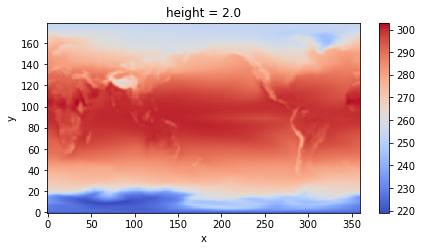

In [13]:
tas_rel.squeeze().plot(aspect=2, size=3.5, cmap=plt.cm.coolwarm)

In [22]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

def mapTasChange(a):
    fig = plt.figure(figsize=(16.5,12.75))
    ax=plt.axes(projection=ccrs.Robinson())
    ax.set_global()
    ax.coastlines()

    i=a-1850
    print(f'starting to plot {a}')

    #calculating temperature anomaly and determining lat and lon
    data = tas_mean[i]-tas_rel
    data, lons = add_cyclic_point(data, coord=grid_1x1.lon)
    lats = grid_1x1.lat

    plt.pcolormesh(lons, lats, data.squeeze(), transform = ccrs.PlateCarree(), cmap='RdBu_r',  vmin=-4, vmax=4)

    #saving figure
    temp = f'tas-anomaly/tas-anom_{a}.png'
    fig.savefig(temp, dpi = 300)
    print(f'{a} finished')

starting to plot 2030
2030 finished


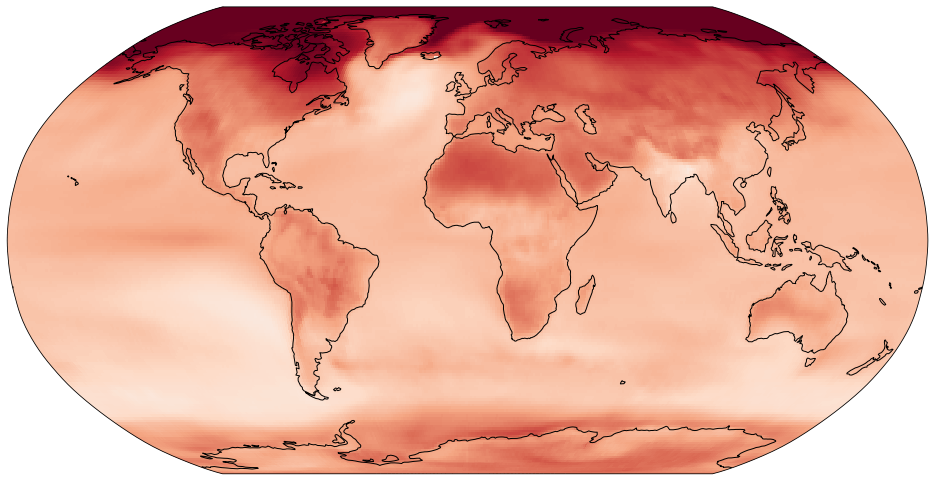

In [23]:
mapTasChange(2030)

starting to plot 1850
1850 finished
starting to plot 1860
1860 finished
starting to plot 1870
1870 finished
starting to plot 1880
1880 finished
starting to plot 1890
1890 finished


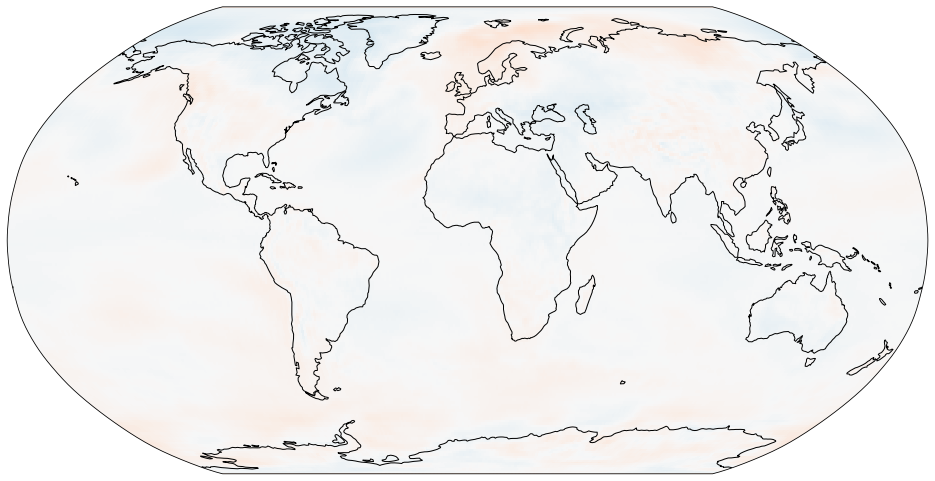

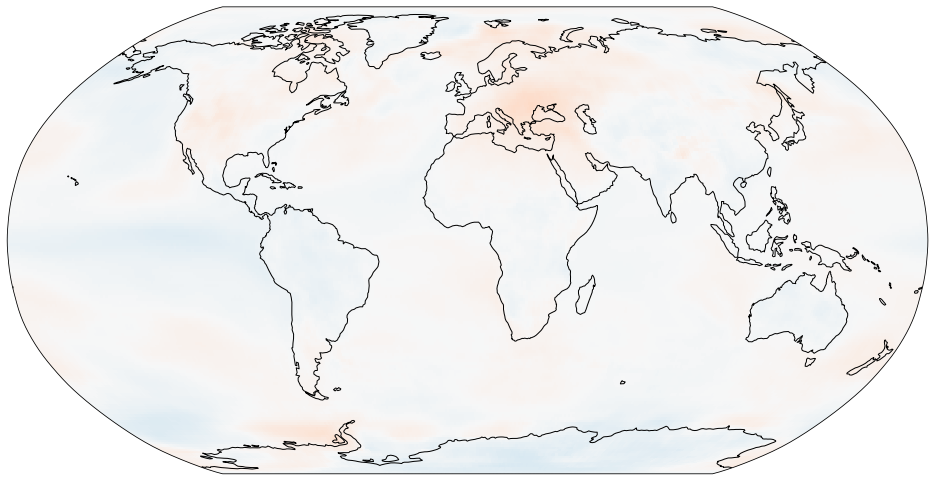

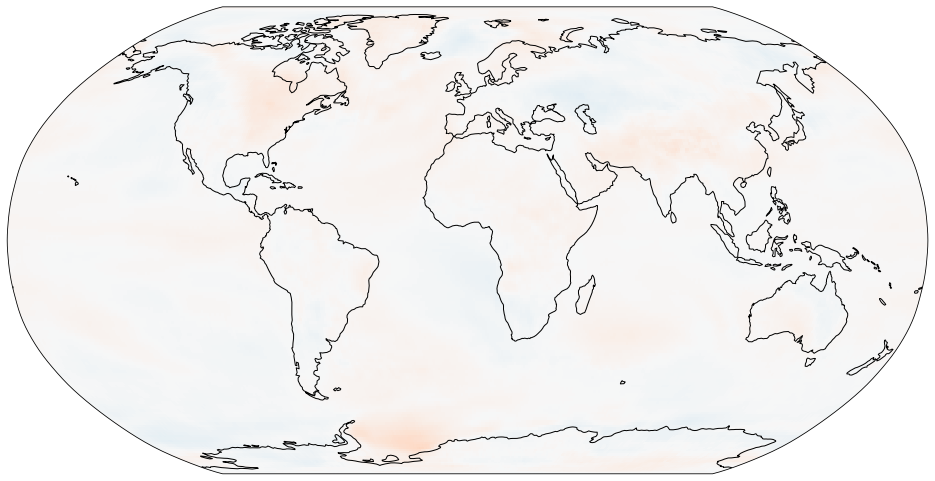

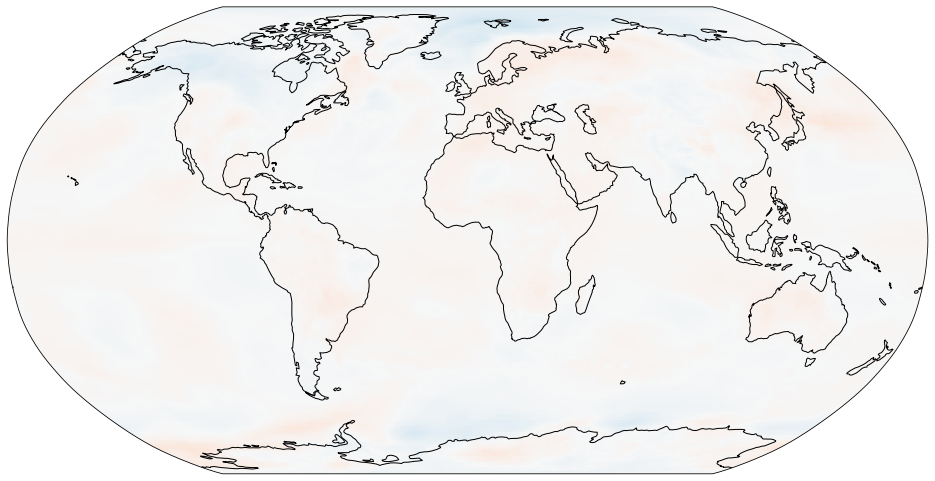

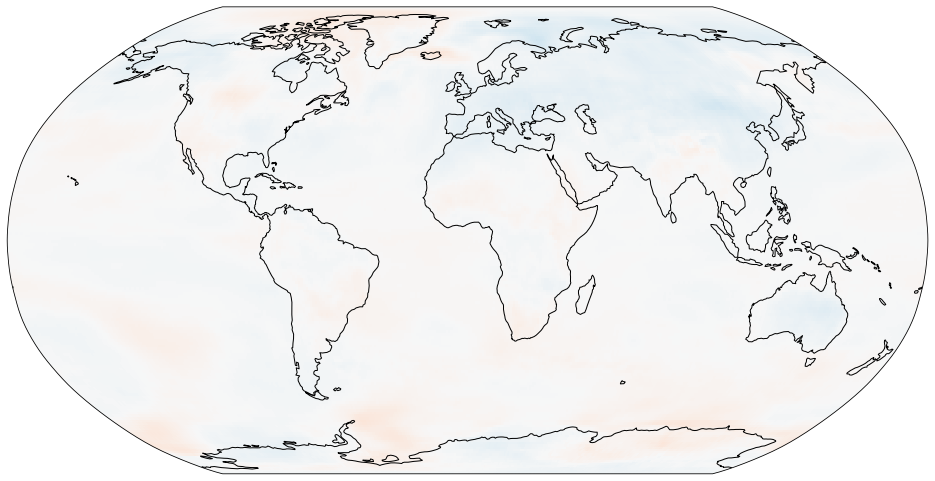

In [24]:
for a in range(1850,1900,10):

    mapTasChange(a)

starting to plot 1900
1900 finished
starting to plot 1910
1910 finished
starting to plot 1920
1920 finished
starting to plot 1930
1930 finished
starting to plot 1940
1940 finished


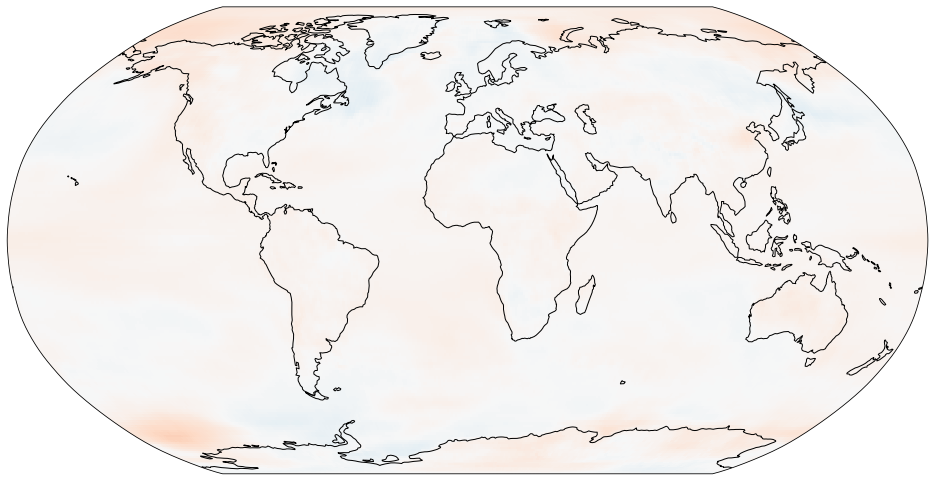

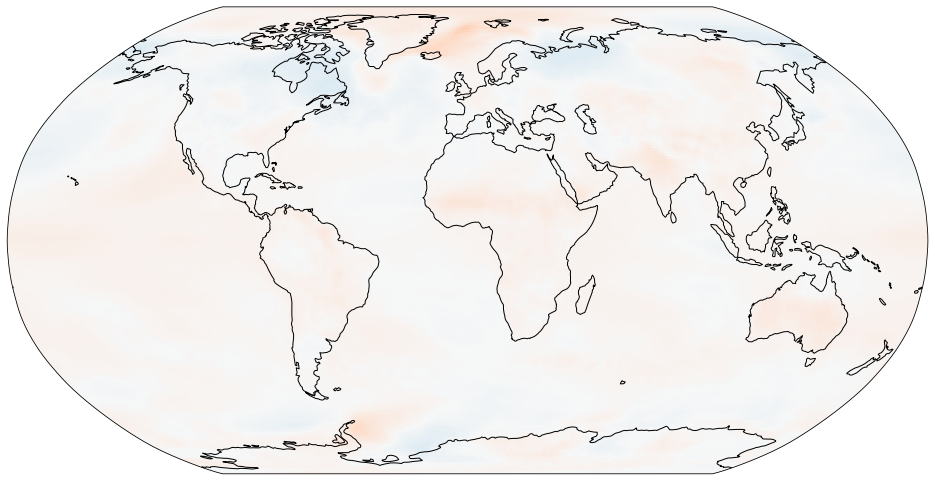

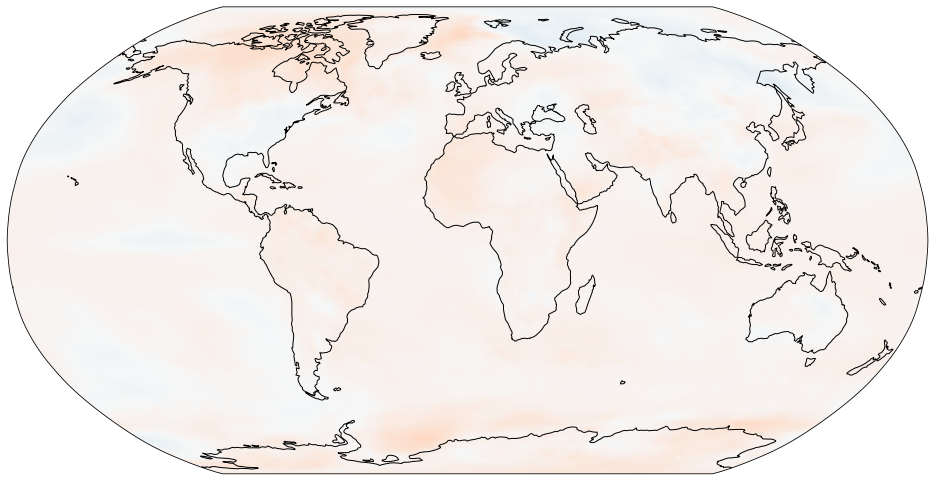

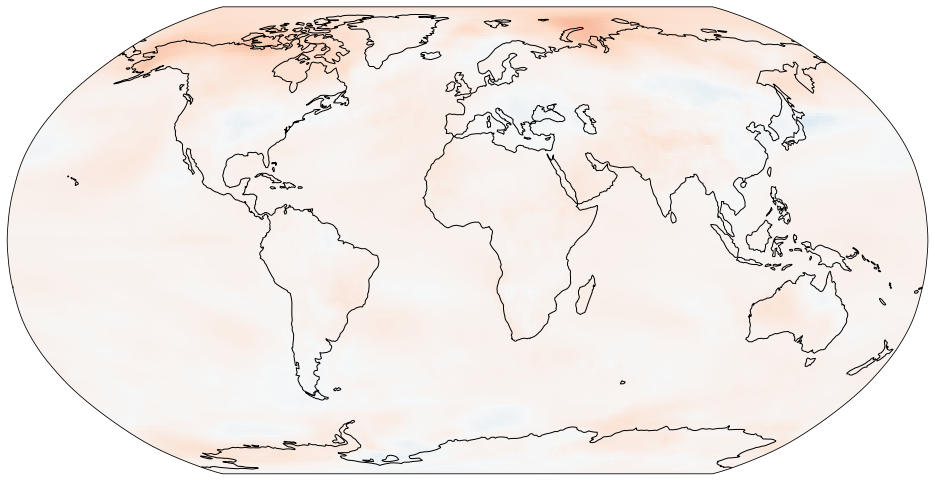

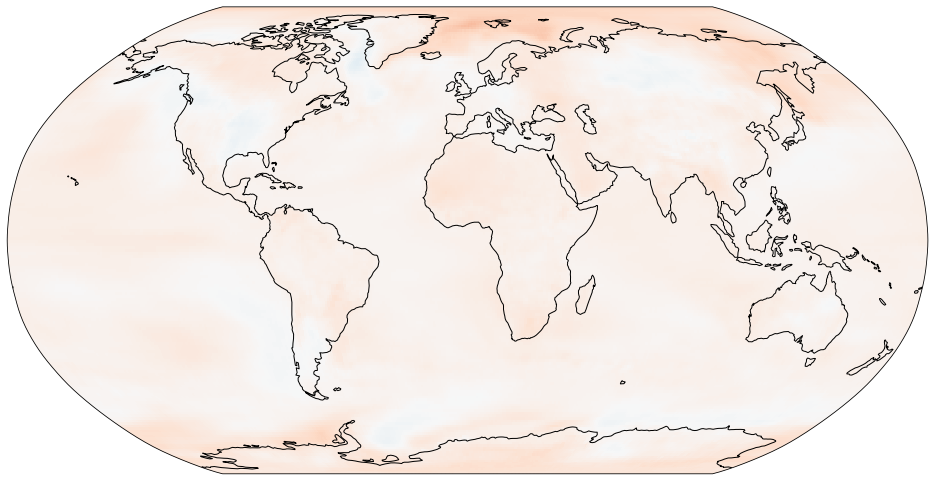

In [25]:
for a in range(1900,1950,10):

    mapTasChange(a)

starting to plot 1950
1950 finished
starting to plot 1960
1960 finished
starting to plot 1970
1970 finished
starting to plot 1980
1980 finished
starting to plot 1990
1990 finished


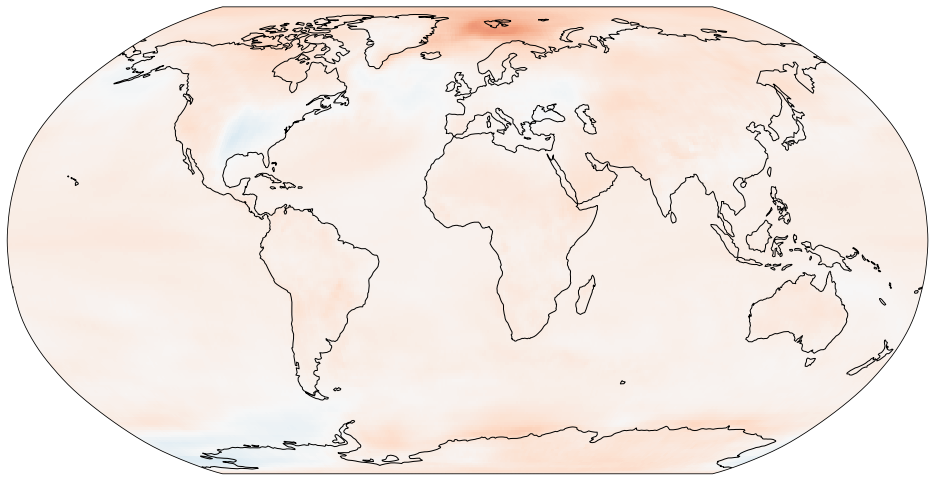

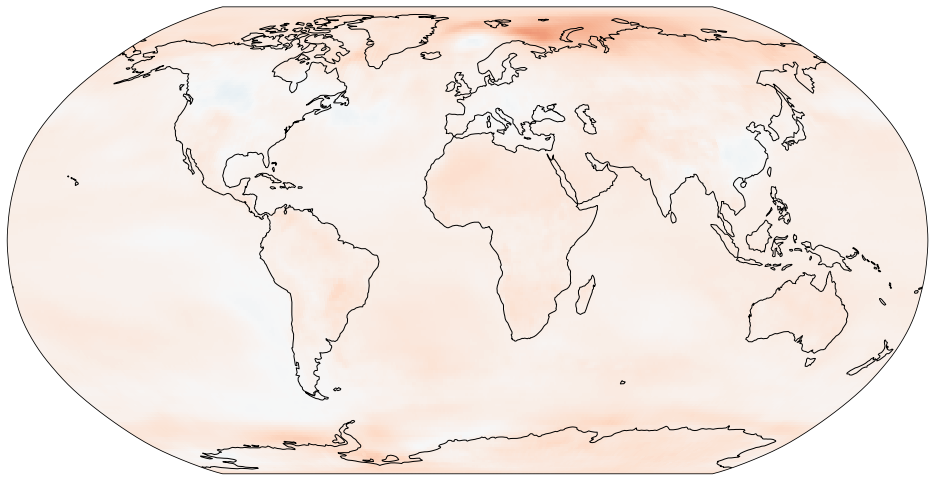

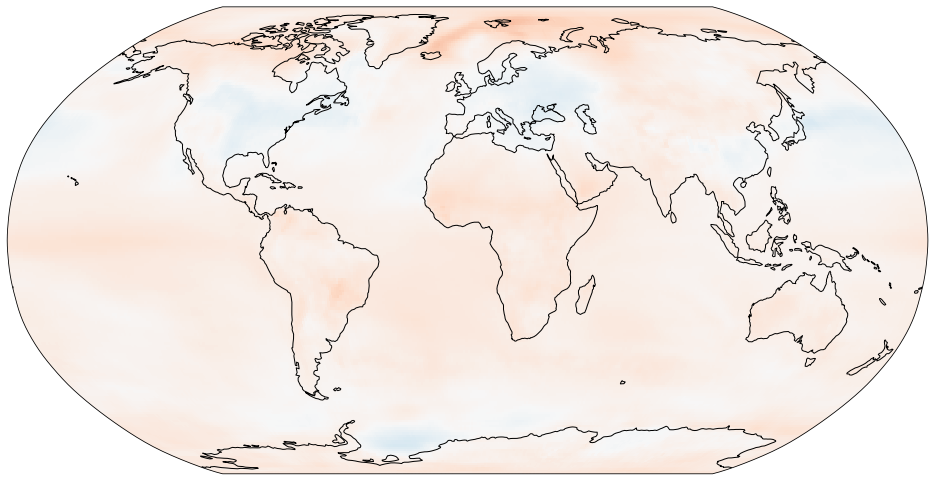

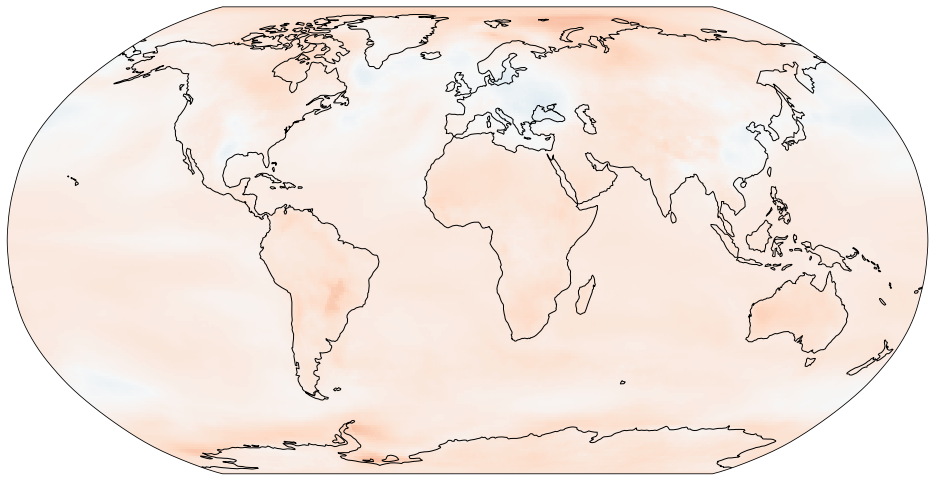

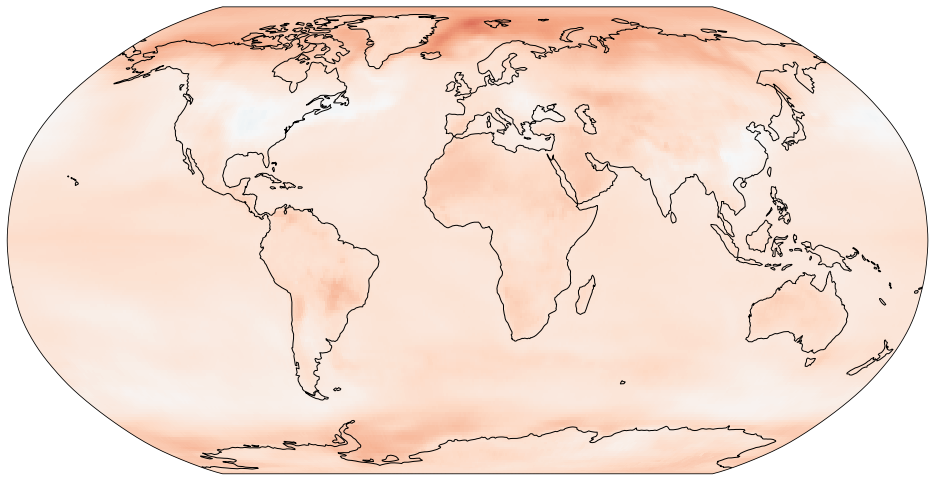

In [26]:
for a in range(1950,2000,10):

    mapTasChange(a)

starting to plot 2000
2000 finished
starting to plot 2010
2010 finished
starting to plot 2020
2020 finished
starting to plot 2030
2030 finished
starting to plot 2040
2040 finished
starting to plot 2050
2050 finished


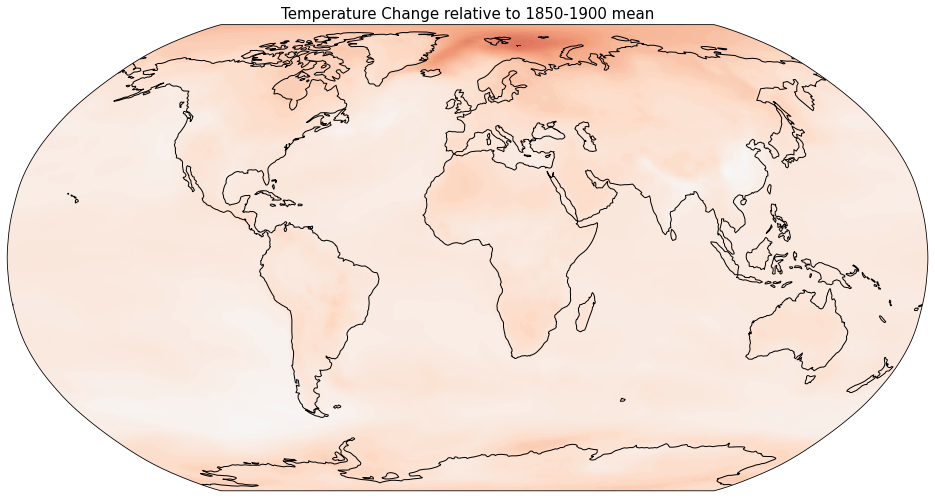

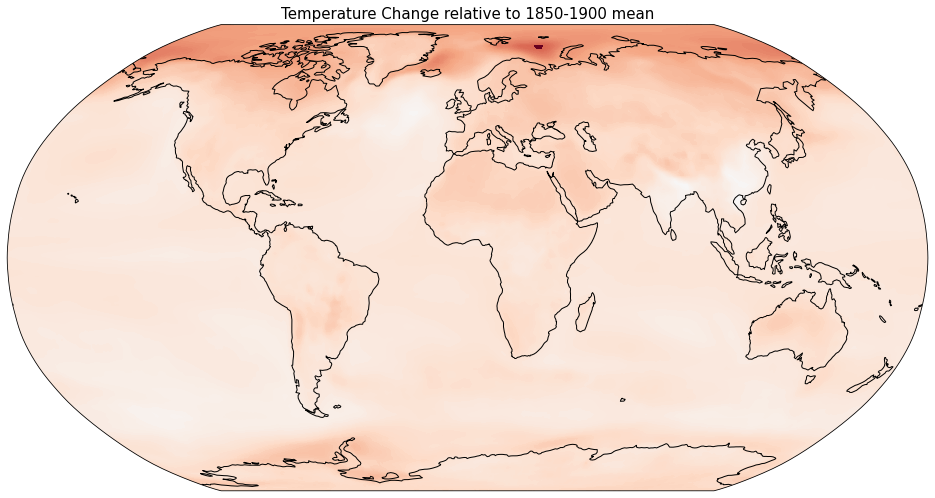

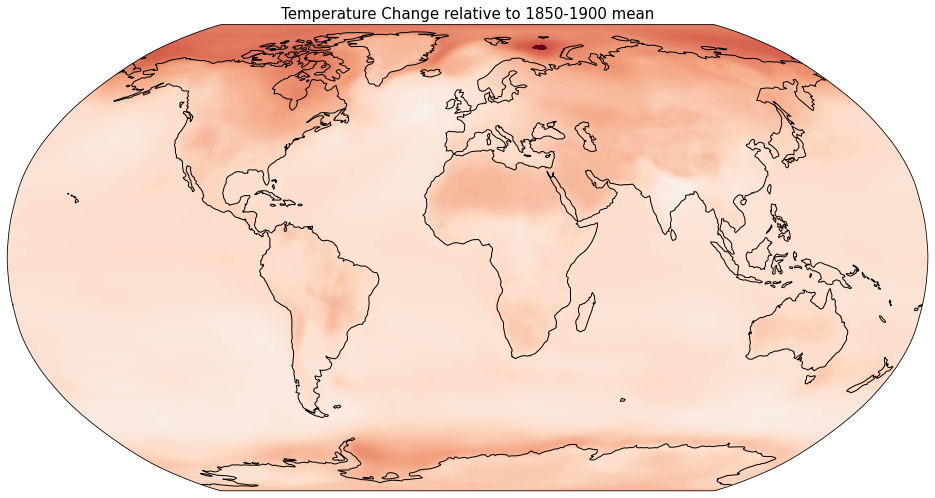

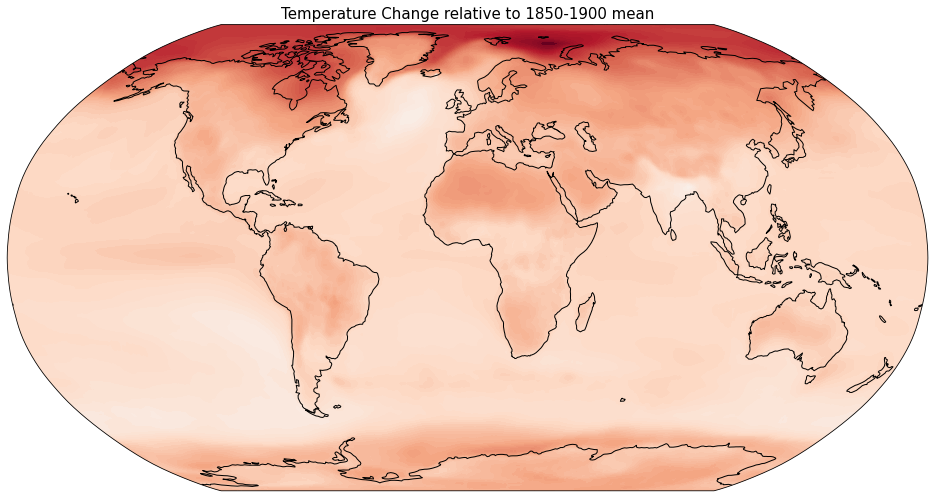

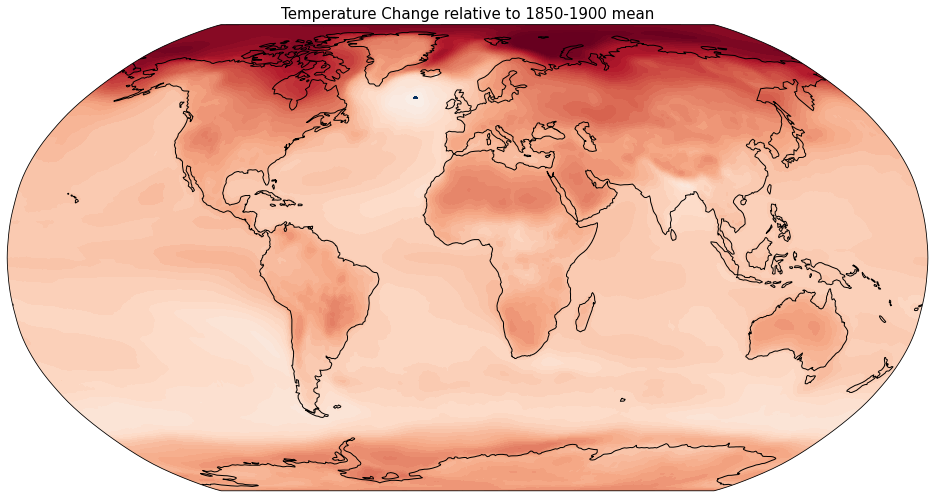

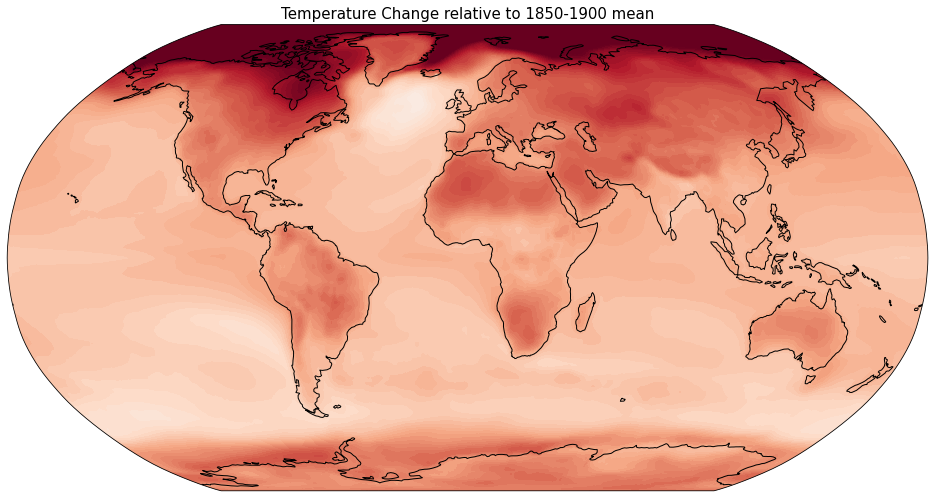

In [18]:
for a in range(2000,2051,10):

    mapTasChange(a)